# 파이썬으로 이미지 처리하기

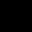

In [1]:
import numpy as np
from PIL import Image

data = np.zeros([32, 32, 3], dtype= np.uint8)
image = Image.fromarray(data, 'RGB')
image

32*32*3크기 3차원의 배열의 값이 전부 제로이다.
그래서 32*32 크기의 이미지가 0,0,0이 의미하는 블랙이 출력되었다.

[[[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 ...

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]]


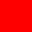

In [2]:
data[:,:] = [255,0,0]
print(data)

image = Image.fromarray(data,'RGB')
image

data[:,:] 에 크기가 3인 배열을 할당했다.
그러면 32 * 32 배열 모두에 브로드캐스팅 된 배열이 할당되어진다.

그러면 가로,세로가 128*128인 화이트 이미지를 만들어보자.

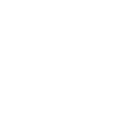

In [3]:

white_image = np.zeros([128,128,3],dtype = np.uint8)
white_image[:,:] = [255,255,255]
image = Image.fromarray(white_image,'RGB')
image

## CIFAR-100 데이터를 받아 개별 이미지 파일 추출하기
CIFAR(https://www.cs.toronto.edu/~kriz/cifar.html)홈페이지에서 이미지 데이터셋을 다운받았다.

In [4]:
import pickle

dir_path = ('./cifar-100-python/')
train_file_path = dir_path+'train'

with open(train_file_path, 'rb') as f:
  train = pickle.load(f, encoding='bytes')

print(type(train))
print(train.keys())
print(type(train[b'filenames']))
print(type(train[b'filenames'][0]))

<class 'dict'>
dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])
<class 'list'>
<class 'bytes'>


키의 이름 문자열 앞에 b가 있다. 키들이 문자열(str)이 아니라 bytes로 되어있다는 점이다.

In [5]:
train[b'filenames'][0:5]

[b'bos_taurus_s_000507.png',
 b'stegosaurus_s_000125.png',
 b'mcintosh_s_000643.png',
 b'altar_boy_s_001435.png',
 b'cichlid_s_000031.png']

'bytes'의 파일명 리스트가 들어있는 것이 확인되었다.

그럼 데이터는 어떤 모습일까?

In [6]:
print(train[b'data'][0:5])
print(type(train[b'data']))
print(train[b'data'][0].shape)

file_name = str(train[b'filenames'][0]).split('.')[0][2:len(train[b'filenames'])]
print(type(file_name))
print(file_name)

[[255 255 255 ...  10  59  79]
 [255 253 253 ... 253 253 255]
 [250 248 247 ... 194 207 228]
 [124 131 135 ... 232 236 231]
 [ 43  32  87 ...  60  29  37]]
<class 'numpy.ndarray'>
(3072,)
<class 'str'>
bos_taurus_s_000507


3072개의 데이터가 들어있는데 3채널 1024(= 32*32) 값이라 보인다. 그러면 이 넘파이배열을 (32,32,3)으로 reshape한 후 출력해보자.
그리고 배열의 마지막차원의 값이 R, G, B의 순으로 들어가게 해주기 위해 order='F'를 써보자.

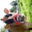

In [7]:
image_data = train[b'data'][0].reshape([32,32,3], order='F')
image = Image.fromarray(image_data)
image

작은 32*32크기의 이미지가 출력되었다.X와 Y축의 뒤집어져 나왔다. 축을 바꿔주기 위해서
np.swapaxes(0,1)을 쓰자.

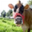

In [8]:
image_data = image_data.swapaxes(0, 1)
image = Image.fromarray(image_data)
image

In [9]:
import os
import pickle
from PIL import Image
import numpy
from tqdm import tqdm

dir_path = ('./cifar-100-python/')
train_file_path = dir_path+'train'

# image를 저장할 cifar-100-python의 하위 디렉토리(images)를 생성합니다. 
images_dir_path = './cifar-images/'
if not os.path.exists(images_dir_path):
    os.mkdir(images_dir_path)  # images 디렉토리 생성

# 32X32의 이미지 파일 50000개를 생성합니다. 
with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')
    for i in tqdm(range(len(train[b'filenames']))):
        image_data = train[b'data'][i].reshape([32,32,3],order='F')
        image_data = image_data.swapaxes(0,1)
        image = Image.fromarray(image_data)
        file_name = str(train[b'filenames'][i]).split('.')[0][2:len(train[b'filenames'])]
        image = image.save(f'{images_dir_path}{file_name}.jpg')

100%|██████████| 50000/50000 [00:06<00:00, 7992.26it/s]


# OpenCV 톺아보기

OpenCV 예제의 전체코드를 보자.

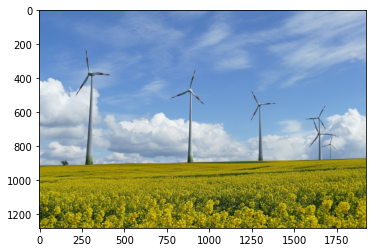

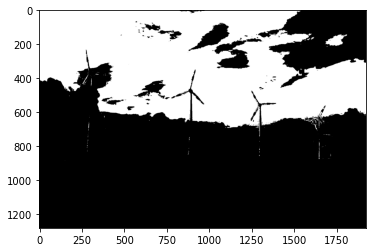

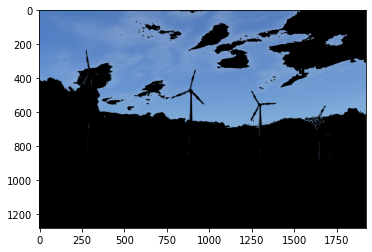

In [10]:
import os
import cv2 as cv
import numpy as np
from  matplotlib import pyplot as plt
%matplotlib inline

img_path = './data/cv_practice.png'
img = cv.imread(img_path)

# Convert BGR to HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# define range of blue color in HSV
lower_blue = np.array([100,100,100])
upper_blue = np.array([130,255,255])

# Threshold the HSV image to get only blue colors
mask = cv.inRange(hsv, lower_blue, upper_blue)

# Bitwise-AND mask and original image
res = cv.bitwise_and(img, img, mask=mask)

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))
plt.show()

OpenCV는 설치할때는 opencv-python이지만 import할 땐, cv2라고 한다.
22년 현재 버전은 4.6이지만, cv2라고 한다.
그리고 OpenCV는 넘파이와 함께 쓴다.
컬러이미지의 경우(너비, 높이, 채널)의 넘파이 배열을 쓰기 때문이다.

PIL때와 다르게, 파일을 불러올 때, imread()함수를 사용한다. 말 그대로 이미지를 읽어와서 반환하는 함수다.

hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV) 함수를 보면
cv가 컬러를 불러오는 기본값이 BGR이라는 것을 알 수 있다.

이번 예제에서는 BGR을 HSV로 변환시켰다. 그거리 위해 cv.cvtColor()함수를 사용한다.

예제 코드는 파랑의 하한선을 색상(Hue) 값 100~130 사이, 채도(Saturation)와 명도(Value)는 100~255 사이라 정의한다.

이에 해당하는 픽셀들에는 1, 해당하지 않는 픽셀은 0을 찍어 반환하는 함수가 cv.inRange()다.

res = cv.bitwise_and(img, img, mask=mask)
cv.bitwise_and() 함수는 이미지1와 이미지2의 비트단위 연산으로 마스크값이 0이 아니면 연산해서 값을 출력한다.

마지막으로 plt.imshow()에서는 이미지를 BGR을 RGB로 변환시켜서 출력해준다.

혹은, 굳이 plt 로 보여주지 않고 cv 로 이미지를 띄우는 방법도 있습니다. cv.imshow(res) 도 PIL.Image.show(), plt.imshow()와 마찬가지로 이미지를 화면에 표시해 줍니다.

In [11]:
import os
import pickle
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
from PIL import Image

# 전처리 시 생성했던 디렉토리 구조
dir_path = './cifar-images'
train_file_path = os.path.join(dir_path, 'train')
images_dir_path = dir_path

In [12]:
# 파일명을 인자로 받아 해당 이미지 파일과 히스토그램을 출력해 주는 함수
def draw_color_histogram_from_image(file_name):
    image_path = os.path.join(images_dir_path, file_name)
    # 이미지 열기
    img = Image.open(image_path)
    cv_image = cv2.imread(image_path)

    # Image와 Histogram 그려보기
    f=plt.figure(figsize=(10,3))
    im1 = f.add_subplot(1,2,1)
    im1.imshow(img)
    im1.set_title("Image")

    im2 = f.add_subplot(1,2,2)
    color = ('b','g','r')
    for i,col in enumerate(color):
        # image에서 i번째 채널의 히스토그램을 뽑아서(0:blue, 1:green, 2:red)
        histr = cv2.calcHist([cv_image],[i],None,[256],[0,256])   
        im2.plot(histr,color = col)   # 그래프를 그릴 때 채널 색상과 맞춰서 그립니다.
    im2.set_title("Histogram")

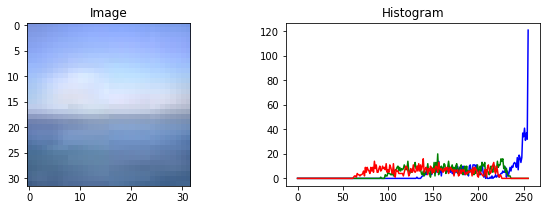

In [13]:
draw_color_histogram_from_image('adriatic_s_001807.jpg')

# 비슷한 이미지 찾아내기 실습

- 프로그램이 실행된다.
- build_histogram_db()
  - CIFAR-100 이미지들을 불러온다.
  - CIFAR-100 이미지들을 하나하나 히스토그램으로 만든다.
  - 이미지 이름을 키로 하고, 히스토그램을 값으로 하는 딕셔너리 histogram_db를 반환한다.
- CIFAR-100 히스토그램 중 입력된 이미지 이름에 해당하는 히스토그램을 입력 이미지로 선택하여 target_histogram이라는 변수명으로 지정한다.
- search()
  - 입력 이미지 히스토그램 target_histogram와 전체 검색 대상 이미지들의 히스토그램을 가진 딕셔너리 histogram_db를 입력으로 받는다.
  - OpenCV의 compareHist() 함수를 사용하여 입력 이미지와 검색 대상 이미지 하나하나의 히스토그램 간 유사도를 계산한다. 결과는 result라는 이름의 딕셔너리로, 키는 이미지 이름, 값은 유사도로 한다.
  - 계산된 유사도를 기준으로 정렬하여 순서를 매긴다.
  - 유사도 순서상으로 상위 5개 이미지만 골라서 result에 남긴다.
- 고른 이미지들을 표시한다.
- 프로그램이 종료된다.

## Build_histogra_db() 구현하기



In [14]:
def get_histogram(image):
    histogram = []

    # Create histograms per channels, in 4 bins each.
    for i in range(3):
        channel_histogram = cv2.calcHist(images=[image],
                                         channels=[i],
                                         mask=None,
                                         histSize=[4],  # 히스토그램 구간을 4개로 한다.
                                         ranges=[0, 256])
        histogram.append(channel_histogram)  

    histogram = np.concatenate(histogram)
    histogram = cv2.normalize(histogram, histogram)

    return histogram

bos_taurus_s_000507.png
./cifar-images/bos_taurus_s_000507.jpg


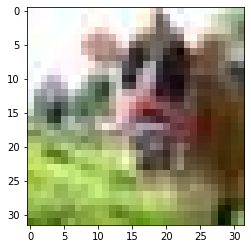

array([[0.3045076 ],
       [0.40424183],
       [0.17082134],
       [0.20689541],
       [0.18991938],
       [0.22917646],
       [0.32042265],
       [0.3469477 ],
       [0.06259913],
       [0.37983876],
       [0.37028974],
       [0.27373856]], dtype=float32)

In [15]:
# get_histogram() 확인용 코드
filename = train[b'filenames'][0].decode()
print(filename)
file_path = f'{images_dir_path}/{filename[:-4]}.jpg'
print(file_path)
image = cv2.imread(file_path)

plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.show()

histogram = get_histogram(image)
histogram

이제 본격적으로 build_histogram_db()를 구해보자.

In [16]:
import os
import pickle
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

def build_histogram_db():
    histogram_db = {}

    #디렉토리에 모아 둔 이미지 파일들을 전부 리스트업합니다. 
    paths = images_dir_path
    file_list = os.listdir(images_dir_path)

    for file_name in tqdm(file_list):
        file_path = os.path.join(images_dir_path, file_name)
        image = cv2.imread(file_path)

        histogram = get_histogram(image)

        histogram_db[file_name] = histogram

    return histogram_db

In [17]:
histogram_db = build_histogram_db()
histogram_db['adriatic_s_001807.jpg']

100%|██████████| 49999/49999 [00:06<00:00, 7167.35it/s]


array([[0.        ],
       [0.        ],
       [0.29169455],
       [0.5868208 ],
       [0.        ],
       [0.16901125],
       [0.41866747],
       [0.29083663],
       [0.00257378],
       [0.33373287],
       [0.38006085],
       [0.16214785]], dtype=float32)

In [18]:
def get_target_histogram():
    filename = input("이미지 파일명을 입력하세요: ")
    if filename not in histogram_db:
        print('유효하지 않은 이미지 파일명입니다.')
        return None
    return histogram_db[filename]

In [19]:
target_histogram = get_target_histogram()
target_histogram

array([[0.6160444 ],
       [0.28845802],
       [0.02729887],
       [0.        ],
       [0.43132207],
       [0.28663808],
       [0.21384111],
       [0.        ],
       [0.22021085],
       [0.25842926],
       [0.2748086 ],
       [0.17835258]], dtype=float32)

In [20]:
def search(histogram_db, target_histogram, top_k=5):
    results = {}

    # Calculate similarity distance by comparing histograms.
    for file_name, histogram in tqdm(histogram_db.items()):
        distance = cv2.compareHist(H1=target_histogram,
                                   H2=histogram,
                                   method=cv2.HISTCMP_CHISQR)

        results[file_name] = distance

    results = dict(sorted(results.items(), key=lambda item: item[1])[:top_k])

    return results

100%|██████████| 49999/49999 [00:00<00:00, 935838.02it/s]


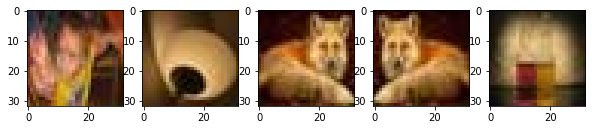

In [23]:
def show_result(result):
    f=plt.figure(figsize=(10,3))
    for idx, filename in enumerate(result.keys()):    
        img_path = os.path.join(images_dir_path, filename)
        im = f.add_subplot(1,len(result),idx+1)
        img = Image.open(img_path)
        im.imshow(img)

target_histogram = get_target_histogram()
result = search(histogram_db, target_histogram)
show_result(result)